## Garaje Data Pills: Joseph Gallart


## Import libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('ggplot')

In [3]:
rated_movies = pd.read_csv("rated_movies.csv")

In [4]:
rated_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105334 entries, 0 to 105333
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105334 non-null  int64  
 1   movieId  105334 non-null  int64  
 2   title    105334 non-null  object 
 3   rating   105334 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


In [5]:
rated_movies.tail()

userId  movieId                        title  rating
105329     668   140098                Runoff (2015)     2.5
105330     668   140816             Tangerine (2015)     2.5
105331     668   141472  The 50 Year Argument (2014)     2.5
105332     668   142488             Spotlight (2015)     4.0
105333     668   142507        Pawn Sacrifice (2015)     3.5

<AxesSubplot:xlabel='rating', ylabel='count'>

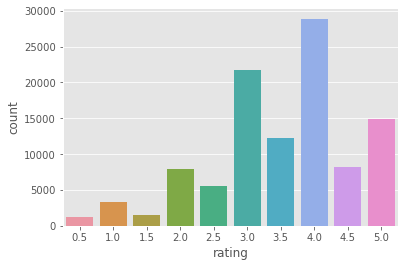

In [6]:
sns.countplot(x='rating', data=rated_movies)

In [7]:
#number of movies in the dataset?
rated_movies["title"].drop_duplicates()

0                                     Casino (1995)
84                                    Powder (1995)
122       Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
329                     Seven (a.k.a. Se7en) (1995)
525                      Usual Suspects, The (1995)
                            ...                    
105329                                Runoff (2015)
105330                             Tangerine (2015)
105331                  The 50 Year Argument (2014)
105332                             Spotlight (2015)
105333                        Pawn Sacrifice (2015)
Name: title, Length: 10323, dtype: object

In [8]:
#number of user?
rated_movies["userId"].drop_duplicates()

0          1
1          9
2         12
3         24
4         29
        ... 
22432    452
25695    488
25793    514
26248    237
49061    142
Name: userId, Length: 668, dtype: int64

In [9]:
rated_movies["movieId"].drop_duplicates()

0             16
84            24
122           32
329           47
525           50
           ...  
105329    140098
105330    140816
105331    141472
105332    142488
105333    142507
Name: movieId, Length: 10323, dtype: int64

In [10]:
rated_movies["userId"].value_counts()

668    5677
575    2836
458    2085
232    1421
310    1287
       ... 
645      20
58       20
497      20
313      20
350      20
Name: userId, Length: 668, dtype: int64

In [11]:
rated_movies.head()

userId  movieId          title  rating
0       1       16  Casino (1995)     4.0
1       9       16  Casino (1995)     4.0
2      12       16  Casino (1995)     1.5
3      24       16  Casino (1995)     4.0
4      29       16  Casino (1995)     3.0

In [12]:
rated_movies[rated_movies["title"]=="Casino (1995)"]

userId  movieId          title  rating
0        1       16  Casino (1995)     4.0
1        9       16  Casino (1995)     4.0
2       12       16  Casino (1995)     1.5
3       24       16  Casino (1995)     4.0
4       29       16  Casino (1995)     3.0
..     ...      ...            ...     ...
79     625       16  Casino (1995)     1.0
80     627       16  Casino (1995)     4.0
81     628       16  Casino (1995)     3.5
82     659       16  Casino (1995)     3.0
83     668       16  Casino (1995)     3.0

[84 rows x 4 columns]

## Collaborative Filtering

In [23]:
rated_movies.head()

userId  movieId          title  rating
0       1       16  Casino (1995)     4.0
1       9       16  Casino (1995)     4.0
2      12       16  Casino (1995)     1.5
3      24       16  Casino (1995)     4.0
4      29       16  Casino (1995)     3.0

In [24]:
ratings_pivot = rated_movies.pivot_table(index='userId', columns='title', values='rating', aggfunc=np.mean)

In [25]:
ratings_pivot.tail()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
664            NaN                                      NaN   
665            NaN                                      NaN   
666            NaN                                      NaN   
667            NaN                                      NaN   
668            NaN                                      NaN   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
664                        NaN                        NaN                 NaN   
665                        NaN                        NaN                 NaN   
666                        NaN                        NaN                 NaN   
667                        NaN                        NaN                 NaN   
668                        2.5                        NaN                 NaN   

title   'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                      
664                      NaN                          NaN   
665                      NaN                          NaN   
666                      NaN                          NaN   
667                      NaN                          NaN   
668                      NaN                          2.0   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
664                                NaN                            NaN   
665                                NaN                            NaN   
666                                NaN                            NaN   
667                                NaN                            NaN   
668                                NaN                            3.0   

title   10 (1979)  ...  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId             ...                                                         
664           NaN  ...           NaN            NaN                      NaN   
665           NaN  ...           NaN            NaN                      NaN   
666           NaN  ...           NaN            NaN                      NaN   
667           NaN  ...           NaN            NaN                      NaN   
668           2.5  ...           NaN            1.5                      0.5   

title   a/k/a Tommy Chong (2005)  eXistenZ (1999)  \
userId                                              
664                          NaN              NaN   
665                          NaN              NaN   
666                          NaN              5.0   
667                          NaN              NaN   
668                          NaN              2.0   

title   loudQUIETloud: A Film About the Pixies (2006)  xXx (2002)  \
userId                                                              
664                                               NaN         NaN   
665                                               NaN         NaN   
666                                               NaN         NaN   
667                                               NaN         NaN   
668                                               NaN         3.5   

title   xXx: State of the Union (2005)  ¡Three Amigos! (1986)  \
userId                                                          
664                                NaN                    NaN   
665                                NaN                    NaN   
666                                NaN                    NaN   
667                                NaN                    NaN   
668                                NaN                    2.0   

title   À nous la liberté (Freedom for Us) (1931)  
userId                                             
664                                           NaN  
665                  

In [26]:
ratings_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 1 to 668
Columns: 10323 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
dtypes: float64(10323)
memory usage: 52.6 MB


In [27]:
ratings_pivot.fillna(0, inplace=True)

In [28]:
ratings_pivot.head()

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
1                          0.0                        0.0                 0.0   
2                          0.0                        0.0                 0.0   
3                          0.0                        0.0                 0.0   
4                          0.0                        0.0                 0.0   
5                          0.0                        0.0                 0.0   

title   'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                      
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   
5                        0.0                          0.0   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   
5                                  0.0                            0.0   

title   10 (1979)  ...  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId             ...                                                         
1             0.0  ...           0.0            0.0                      0.0   
2             0.0  ...           0.0            0.0                      0.0   
3             0.0  ...           0.0            0.0                      0.0   
4             0.0  ...           0.0            0.0                      0.0   
5             0.0  ...           0.0            0.0                      0.0   

title   a/k/a Tommy Chong (2005)  eXistenZ (1999)  \
userId                                              
1                            0.0              0.0   
2                            0.0              0.0   
3                            0.0              0.0   
4                            0.0              0.0   
5                            0.0              0.0   

title   loudQUIETloud: A Film About the Pixies (2006)  xXx (2002)  \
userId                                                              
1                                                 0.0         0.0   
2                                                 0.0         0.0   
3                                                 0.0         0.0   
4                                                 0.0         0.0   
5                                                 0.0         0.0   

title   xXx: State of the Union (2005)  ¡Three Amigos! (1986)  \
userId                                                          
1                                  0.0                    0.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    0.0   
5                                  0.0                    0.0   

title   À nous la liberté (Freedom for Us) (1931)  
userId                                             
1                                             0.0  
2                    

In [29]:
#modulo que permite trabajar con martrices dispersas
sparse_ratings = sp.sparse.csr_matrix(ratings_pivot.values)

In [30]:
sparse_ratings

<668x10323 sparse matrix of type '<class 'numpy.float64'>'
	with 105334 stored elements in Compressed Sparse Row format>

In [32]:
sparse_ratings.T

<10323x668 sparse matrix of type '<class 'numpy.float64'>'
	with 105334 stored elements in Compressed Sparse Column format>

In [33]:
user_similarity = cosine_similarity(sparse_ratings)
item_similarity = cosine_similarity(sparse_ratings.T)

In [34]:
len(user_similarity)

668

In [35]:
len(item_similarity)

10323

In [36]:
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [37]:
user_similarity_df.head()

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.101113  0.210044  0.128766  0.057896  0.077130  0.358090   
2       0.101113  1.000000  0.115559  0.034610  0.032705  0.028305  0.062914   
3       0.210044  0.115559  1.000000  0.058208  0.044426  0.012816  0.084522   
4       0.128766  0.034610  0.058208  1.000000  0.019298  0.005781  0.059089   
5       0.057896  0.032705  0.044426  0.019298  1.000000  0.053378  0.080822   

userId       8         9         10   ...       659       660       661  \
userId                                ...                                 
1       0.097434  0.239189  0.026663  ...  0.291162  0.144741  0.106583   
2       0.471918  0.194232  0.000000  ...  0.068325  0.000000  0.477330   
3       0.066620  0.459703  0.068454  ...  0.152078  0.301021  0.081626   
4       0.024420  0.050572  0.000000  ...  0.055860  0.024329  0.040467   
5       0.041536  0.023168  0.011915  ...  0.058450  0.007315  0.024708   

userId       662       663       664       665       666       667       668  
userId                                                                        
1       0.091049  0.236805  0.154519  0.245071  0.238660  0.278217  0.153493  
2       0.146887  0.163553  0.061737  0.050948  0.051423  0.035907  0.064822  
3       0.098949  0.310234  0.079452  0.092821  0.080940  0.158943  0.109658  
4       0.108881  0.076241  0.014011  0.042643  0.174275  0.061677  0.157809  
5       0.038163  0.053085  0.048993  0.055431  0.026053  0.086667  0.068281  

[5 rows x 668 columns]

In [38]:
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_pivot.columns, columns=ratings_pivot.columns)

In [39]:
item_similarity_df.head()

title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      1.0   
'Hellboy': The Seeds of Creation (2004)         0.0   
'Round Midnight (1986)                          0.0   
'Til There Was You (1997)                       0.0   
'burbs, The (1989)                              0.0   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                                   0.0   
'Hellboy': The Seeds of Creation (2004)                                      1.0   
'Round Midnight (1986)                                                       0.0   
'Til There Was You (1997)                                                    0.0   
'burbs, The (1989)                                                           0.0   

title                                    'Round Midnight (1986)  \
title                                                             
'71 (2014)                                                  0.0   
'Hellboy': The Seeds of Creation (2004)                     0.0   
'Round Midnight (1986)                                      1.0   
'Til There Was You (1997)                                   0.0   
'burbs, The (1989)                                          0.0   

title                                    'Til There Was You (1997)  \
title                                                                
'71 (2014)                                                     0.0   
'Hellboy': The Seeds of Creation (2004)                        0.0   
'Round Midnight (1986)                                         0.0   
'Til There Was You (1997)                                      1.0   
'burbs, The (1989)                                             0.0   

title                                    'burbs, The (1989)  \
title                                                         
'71 (2014)                                              0.0   
'Hellboy': The Seeds of Creation (2004)                 0.0   
'Round Midnight (1986)                                  0.0   
'Til There Was You (1997)                               0.0   
'burbs, The (1989)                                      1.0   

title                                    'night Mother (1986)  \
title                                                           
'71 (2014)                                                0.0   
'Hellboy': The Seeds of Creation (2004)                   0.0   
'Round Midnight (1986)                                    0.0   
'Til There Was You (1997)                                 0.0   
'burbs, The (1989)                                        0.0   

title                                    (500) Days of Summer (2009)  \
title                                                                  
'71 (2014)                                                  0.000000   
'Hellboy': The Seeds of Creation (2004)                     0.000000   
'Round Midnight (1986)                                      0.081094   
'Til There Was You (1997)                                   0.000000   
'burbs, The (1989)                                          0.031610   

title                                    *batteries not included (1987)  \
title                                                                     
'71 (2014)                                                     0.000000   
'Hellboy': The Seeds of Creation (2004)                        0.000000   
'Round Midnight (1986)                                         0.000000   
'Til There Was You (1997)                                      0.000000   
'burbs, The (1989)                                             0.231897   

title                                    ...And Justice for All (1979)  \
title                                                        

In [40]:
item_similarity_df["Jurassic Park (1993)"].sort_values(ascending=False)

title
Jurassic Park (1993)                     1.000000
Forrest Gump (1994)                      0.723907
Terminator 2: Judgment Day (1991)        0.721036
Speed (1994)                             0.698808
Fugitive, The (1993)                     0.685745
                                           ...   
Kids World (2000)                        0.000000
Kika (1993)                              0.000000
Killing Season (2013)                    0.000000
King Creole (1958)                       0.000000
Lady Snowblood (Shurayukihime) (1973)    0.000000
Name: Jurassic Park (1993), Length: 10323, dtype: float64

In [41]:
item_similarity_df['10 (1979)'].sort_values(ascending=False)

title
10 (1979)                                                    1.00000
Katyn (2007)                                                 0.96225
Belle époque (1992)                                          0.96225
Gatekeepers, The (2012)                                      0.96225
Dance with a Stranger (1985)                                 0.96225
                                                              ...   
Lake of Fire (2006)                                          0.00000
Lakeboat (2000)                                              0.00000
Land Before Time III: The Time of the Great Giving (1995)    0.00000
Land Before Time, The (1988)                                 0.00000
'71 (2014)                                                   0.00000
Name: 10 (1979), Length: 10323, dtype: float64

In [42]:
user_similarity_df[2].sort_values(ascending=False)

userId
2      1.000000
96     0.755883
648    0.683034
536    0.599568
151    0.558591
         ...   
173    0.000000
488    0.000000
608    0.000000
194    0.000000
465    0.000000
Name: 2, Length: 668, dtype: float64

In [49]:
user_similarity_df[96].sort_values(ascending=False)

userId
96     1.000000
648    0.760980
2      0.755883
536    0.694719
271    0.670698
         ...   
216    0.000000
360    0.000000
474    0.000000
362    0.000000
346    0.000000
Name: 96, Length: 668, dtype: float64

In [92]:
lista_user96= rated_movies[rated_movies['userId'] ==96].sort_values(by="title")

In [93]:
lista_user648= rated_movies[rated_movies['userId'] ==648].sort_values(by="title")

In [107]:
resultado=pd.merge(lista_user96,lista_user648, on=["movieId"], how='left')


In [118]:
resultado[pd.isnull(resultado["userId_y"])]

userId_x  movieId                                     title_x  rating_x  \
0         96      737                            Barb Wire (1996)       1.0   
1         96       65                             Bio-Dome (1996)       3.0   
10        96      608                                Fargo (1996)       4.0   
13        96      104                        Happy Gilmore (1996)       4.0   
17        96      661            James and the Giant Peach (1996)       1.0   
20        96       52                     Mighty Aphrodite (1995)       1.0   
22        96     1414                               Mother (1996)       5.0   
25        96      107               Muppet Treasure Island (1996)       3.0   
28        96      802                           Phenomenon (1996)       4.0   
30        96      628                          Primal Fear (1996)       1.0   
31        96      832                               Ransom (1996)       4.0   
34        96      112  Rumble in the Bronx (Hont faan kui) (1995)       3.0   
37        96      637                           Sgt. Bilko (1996)       1.0   
38        96      743                             Spy Hard (1996)       1.0   
42        96        9                         Sudden Death (1995)       1.0   
43        96      805                      Time to Kill, A (1996)       4.0   
45        96      778                        Trainspotting (1996)       1.0   
47        96      140                Up Close and Personal (1996)       4.0   
48        96     1073  Willy Wonka & the Chocolate Factory (1971)       4.0   

    userId_y title_y  rating_y  
0        NaN     NaN       NaN  
1        NaN     NaN       NaN  
10       NaN     NaN       NaN  
13       NaN     NaN       NaN  
17       NaN     NaN       NaN  
20       NaN     NaN       NaN  
22       NaN     NaN       NaN  
25       NaN     NaN       NaN  
28       NaN     NaN       NaN  
30       NaN     NaN       NaN  
31       NaN     NaN       NaN  
34       NaN     NaN       NaN  
37       NaN     NaN       NaN  
38       NaN     NaN       NaN  
42       NaN     NaN       NaN  
43       NaN     NaN       NaN  
45       NaN     NaN       NaN  
47       NaN     NaN       NaN  
48       NaN     NaN       NaN

In [120]:
lista_user648[lista_user648["movieId"]==1414]

Empty DataFrame
Columns: [userId, movieId, title, rating]
Index: []